In [1]:
from pathlib import Path
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt

In [2]:
plt.style.use('ggplot')


import matplotlib as mpl

mpl.rcParams['axes.titlesize'] = 11
mpl.rcParams['axes.titlecolor'] = '#333333'
mpl.rcParams['legend.facecolor'] = '#fbfbfb'

In [3]:
figs_dir = Path("..") / "figs"

if not figs_dir.is_dir():
    figs_dir.mkdir(parents=True)

# Plot results against number of receivers

In [4]:
results_dir = Path("..") /  "results"
fname = results_dir / "benchmark_n-receivers.nc"

In [5]:
dataset = xr.load_dataset(fname)
dataset

<xarray.Dataset>
Dimensions:          (n_receivers: 6, simulation_type: 2, engine: 2, parallel: 2)
Coordinates:
  * n_receivers      (n_receivers) int32 400 1600 3600 6400 10000 14400
  * simulation_type  (simulation_type) object 'ram' 'forward_only'
  * engine           (engine) object 'geoana' 'choclo'
  * parallel         (parallel) bool False True
Data variables:
    times            (parallel, simulation_type, engine, n_receivers) float64 ...
    errors           (parallel, simulation_type, engine, n_receivers) float64 ...

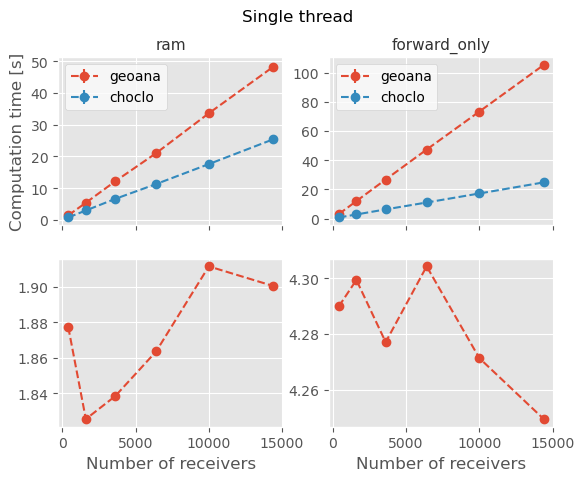

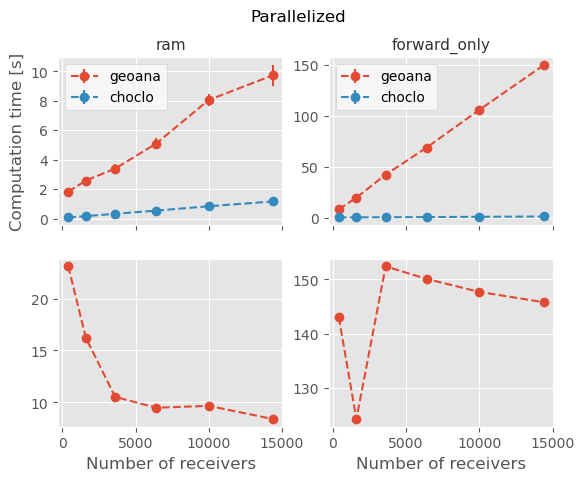

In [6]:
for parallel in (False, True):

    ncols, nrows = 2, 2
    fig, axes = plt.subplots(nrows=nrows, ncols=ncols, sharex=True)
    if parallel:
        fig.suptitle("Parallelized")
    else:
        fig.suptitle("Single thread")

    for col, simulation_type in zip(range(ncols), dataset.simulation_type):

        # First row
        ax = axes[0, col]
        for engine in dataset.engine:
            results = dataset.sel(
                engine=engine, simulation_type=simulation_type, parallel=parallel
            )

            engine_str = str(engine.values)
            ax.errorbar(
                x=results.n_receivers,
                y=results.times,
                yerr=results.errors,
                marker="o",
                linestyle="dashed",
                label=engine_str,
            )
        ax.legend()
        ax.set_title(str(simulation_type.values))
        if col == 0:
            ax.set_ylabel("Computation time [s]")

        # Second row
        ax = axes[1, col]
        results = dataset.sel(simulation_type=simulation_type, parallel=parallel)

        relative = results.sel(engine="geoana").times / results.sel(engine="choclo").times

        engine_str = str(results.engine.values)
        ax.plot(
            relative.n_receivers,
            relative,
            marker="o",
            linestyle="dashed",
        )
        ax.set_xlabel("Number of receivers")

    plt.show()

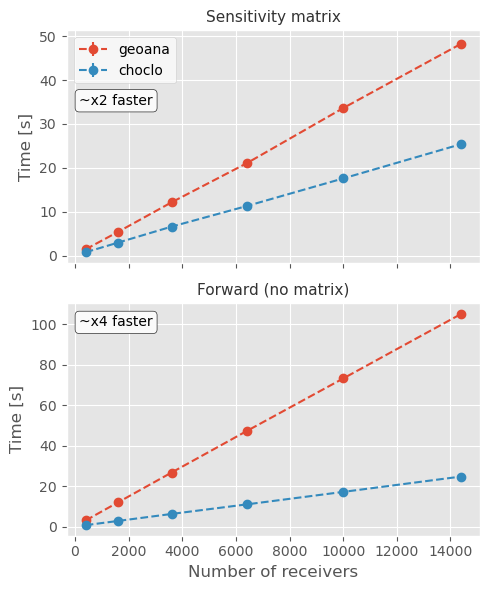

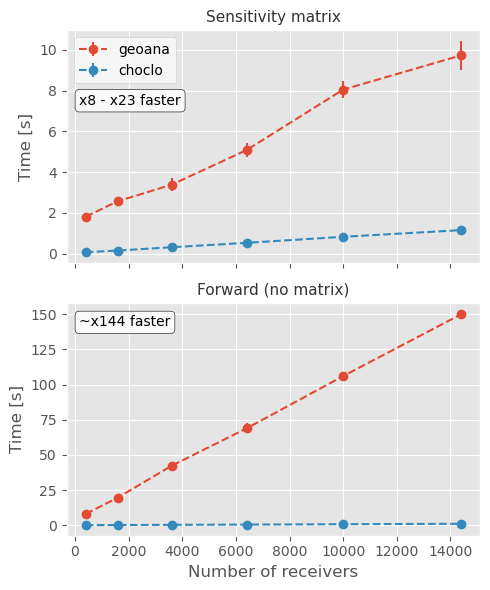

In [7]:
for parallel in (False, True):

    ncols, nrows = 1, 2
    figsize = (5, 6)
    fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=figsize, sharex=True)

    for row, simulation_type in zip(range(nrows), dataset.simulation_type):

        ax = axes[row]
        for engine in dataset.engine:
            results = dataset.sel(
                engine=engine, simulation_type=simulation_type, parallel=parallel
            )

            engine_str = str(engine.values)
            ax.errorbar(
                x=results.n_receivers,
                y=results.times,
                yerr=results.errors,
                marker="o",
                linestyle="dashed",
                label=engine_str,
            )
        sim_type_str = str(simulation_type.values)
        if sim_type_str == "forward_only":
            sim_type_str = "Forward (no matrix)"
        elif sim_type_str == "ram":
            sim_type_str = "Sensitivity matrix"
        ax.set_title(sim_type_str)

        ax.set_ylabel("Time [s]")

        # Annotate ratio 
        times = dataset.times.sel(simulation_type=simulation_type, parallel=parallel)        
        ratio = times.sel(engine="geoana") / times.sel(engine="choclo")
        vmin, vmax = np.min(ratio.values), np.max(ratio.values)
        if vmax / vmin < 1.4:
            text = f"~x{round(np.mean(ratio.values))} faster"
        else:
            text = f"x{round(vmin)} - x{round(vmax)} faster"
        if row == 0:
            loc = (0.03, 0.68)
        else:
            loc = (0.03, 0.9)
        ax.annotate(
            text,
            loc,
            xycoords="axes fraction",
            bbox=dict(boxstyle="round", fc="#fafafa", ec="#2e2e2e", alpha=1)
        )
        
        # Add legend
        if row == 0:
            ax.legend(loc="upper left")
        if row == 1:
            ax.set_xlabel("Number of receivers")
    
    plt.tight_layout()
    
    # Save to disk
    if parallel: 
        parallel_str = "parallel"
    else:
        parallel_str = "serial"
    
    plt.savefig(figs_dir / f"benchmark_n-receivers_{parallel_str}.png")
    
    plt.show()

# Plot results against number of cells in the mesh

In [8]:
results_dir = Path("..") /  "results"
fname = results_dir / "benchmark_n-cells.nc"

In [9]:
dataset = xr.load_dataset(fname)
dataset

<xarray.Dataset>
Dimensions:          (n_cells: 5, simulation_type: 2, engine: 2, parallel: 2)
Coordinates:
  * n_cells          (n_cells) int32 8000 64000 216000 512000 1000000
  * simulation_type  (simulation_type) object 'ram' 'forward_only'
  * engine           (engine) object 'geoana' 'choclo'
  * parallel         (parallel) bool False True
Data variables:
    times            (parallel, simulation_type, engine, n_cells) float64 2.5...
    errors           (parallel, simulation_type, engine, n_cells) float64 0.0...

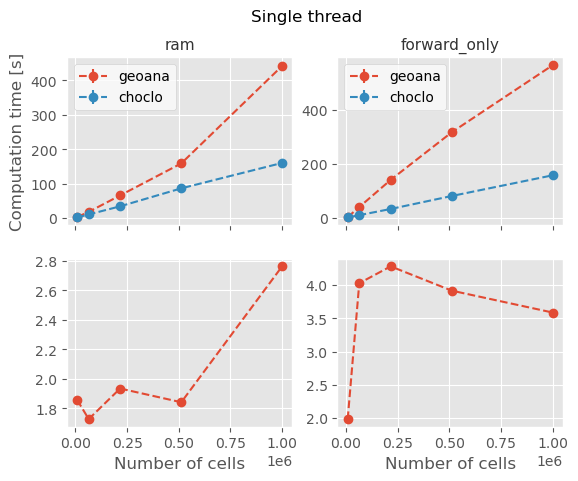

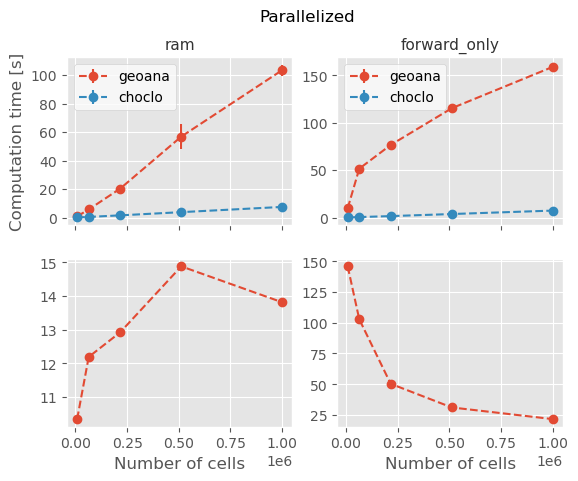

In [10]:
for parallel in (False, True):

    ncols, nrows = 2, 2
    fig, axes = plt.subplots(nrows=nrows, ncols=ncols, sharex=True)
    if parallel:
        fig.suptitle("Parallelized")
    else:
        fig.suptitle("Single thread")

    for col, simulation_type in zip(range(ncols), dataset.simulation_type):

        # First row
        ax = axes[0, col]
        for engine in dataset.engine:
            results = dataset.sel(
                engine=engine, simulation_type=simulation_type, parallel=parallel
            )

            engine_str = str(engine.values)
            ax.errorbar(
                x=results.n_cells,
                y=results.times,
                yerr=results.errors,
                marker="o",
                linestyle="dashed",
                label=engine_str,
            )
        ax.legend()
        ax.set_title(str(simulation_type.values))
        if col == 0:
            ax.set_ylabel("Computation time [s]")

        # Second row
        ax = axes[1, col]
        results = dataset.sel(simulation_type=simulation_type, parallel=parallel)

        relative = results.sel(engine="geoana").times / results.sel(engine="choclo").times

        engine_str = str(results.engine.values)
        ax.plot(
            relative.n_cells,
            relative,
            marker="o",
            linestyle="dashed",
        )
        ax.set_xlabel("Number of cells")

    plt.show()

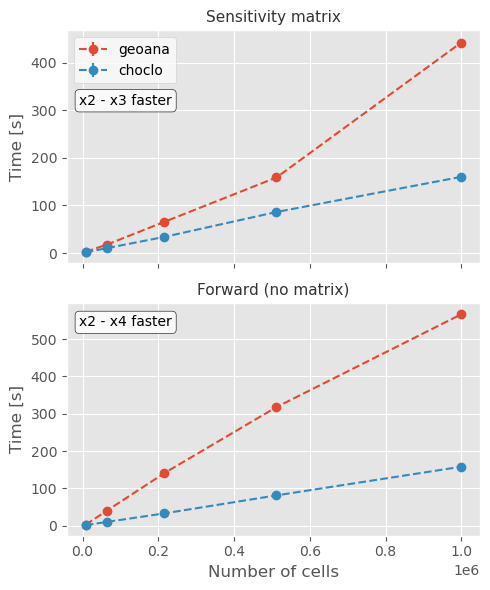

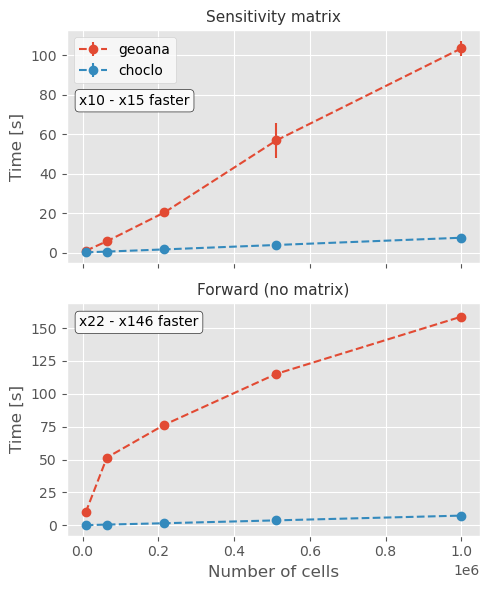

In [11]:
for parallel in (False, True):

    ncols, nrows = 1, 2
    figsize = (5, 6)
    fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=figsize, sharex=True)

    for row, simulation_type in zip(range(nrows), dataset.simulation_type):

        ax = axes[row]
        for engine in dataset.engine:
            results = dataset.sel(
                engine=engine, simulation_type=simulation_type, parallel=parallel
            )

            engine_str = str(engine.values)
            ax.errorbar(
                x=results.n_cells,
                y=results.times,
                yerr=results.errors,
                marker="o",
                linestyle="dashed",
                label=engine_str,
            )
        sim_type_str = str(simulation_type.values)
        if sim_type_str == "forward_only":
            sim_type_str = "Forward (no matrix)"
        elif sim_type_str == "ram":
            sim_type_str = "Sensitivity matrix"
        ax.set_title(sim_type_str)

        ax.set_ylabel("Time [s]")

        # Annotate ratio 
        times = dataset.times.sel(simulation_type=simulation_type, parallel=parallel)        
        ratio = times.sel(engine="geoana") / times.sel(engine="choclo")
        vmin, vmax = np.min(ratio.values), np.max(ratio.values)
        if vmax / vmin < 1.4:
            text = f"~x{round(np.mean(ratio.values))} faster"
        else:
            text = f"x{round(vmin)} - x{round(vmax)} faster"
            
        if row == 0:
            loc = (0.03, 0.68)
        else:
            loc = (0.03, 0.9)
            
        ax.annotate(
            text,
            loc,
            xycoords="axes fraction",
            bbox=dict(boxstyle="round", fc="#fafafa", ec="#2e2e2e", alpha=1)
        )
        # ---------------------------------
        
        # Add legend
        if row == 0:
            ax.legend(loc="upper left")
        if row == 1:
            ax.set_xlabel("Number of cells")
    
    plt.tight_layout()
    
    # Save to disk
    if parallel: 
        parallel_str = "parallel"
    else:
        parallel_str = "serial"
    
    # plt.savefig(figs_dir / f"benchmark_n-cells_{parallel_str}.png")
    
    plt.show()

# Plot results against number of processors used

In [12]:
results_dir = Path("..") /  "results"
fname = results_dir / "benchmark_n-processes.nc"

In [13]:
dataset = xr.load_dataset(fname)
dataset

<xarray.Dataset>
Dimensions:          (n_processes: 6, simulation_type: 2, engine: 2)
Coordinates:
  * n_processes      (n_processes) int32 1 5 10 20 30 48
  * simulation_type  (simulation_type) object 'ram' 'forward_only'
  * engine           (engine) object 'geoana' 'choclo'
Data variables:
    times            (engine, simulation_type, n_processes) float64 73.42 ......
    errors           (engine, simulation_type, n_processes) float64 1.876 ......

In [14]:
dataset["n_processes"] = dataset.n_processes.fillna(48)

In [15]:
dataset

<xarray.Dataset>
Dimensions:          (n_processes: 6, simulation_type: 2, engine: 2)
Coordinates:
  * n_processes      (n_processes) int32 1 5 10 20 30 48
  * simulation_type  (simulation_type) object 'ram' 'forward_only'
  * engine           (engine) object 'geoana' 'choclo'
Data variables:
    times            (engine, simulation_type, n_processes) float64 73.42 ......
    errors           (engine, simulation_type, n_processes) float64 1.876 ......

ValueError: 'x' and 'y' must have the same size

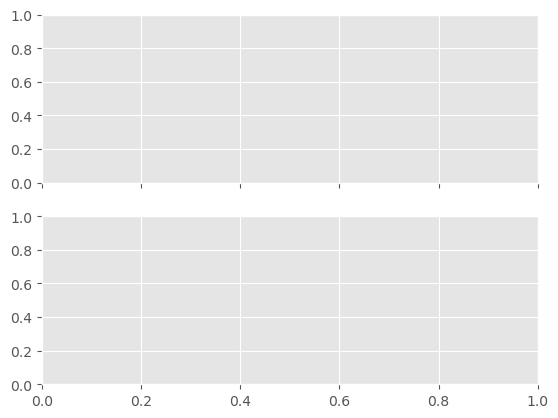

In [16]:
ncols, nrows = 1, 2
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, sharex=True)


# First row
ax = axes[0]
for engine in dataset.engine:
    results = dataset.sel( engine=engine )

    engine_str = str(engine.values)
    ax.errorbar(
        x=results.n_processes,
        y=results.times,
        yerr=results.errors,
        marker="o",
        linestyle="dashed",
        label=engine_str,
    )
ax.legend()
ax.set_title(str(simulation_type.values))
if col == 0:
    ax.set_ylabel("Computation time [s]")

# Second row
ax = axes[1]
results = dataset

relative = results.sel(engine="geoana").times / results.sel(engine="choclo").times

engine_str = str(results.engine.values)
ax.plot(
    relative.n_processes,
    relative,
    marker="o",
    linestyle="dashed",
)
ax.set_xlabel("Number of threads")

plt.show()